In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sweep_ids = ['g1aqz63h', 'otphs2zh',
             's45fguzh', '1cesj6eh',
             'ire6sash', 'bc20nbk8']
config_names = ['tl_fast1', 'tl_fast1',
                'tl_best5', 'tl_best5',
                'tl_best4', 'tl_best4']

In [4]:
import wandb
api = wandb.Api()

In [5]:
metric = 'f1_score'

In [6]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(config_names[i])
        f1_scores.append(run.summary[metric])

In [7]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]
sweep_id = "bk150cyb"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    f1_scores.append(run.summary[metric])

In [8]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', metric])
f1_df.tail()

,config,name,f1_score
35,tl_fast1,devout-sweep-1,0.976330
36,tl_fast1,curious-sweep-2,0.975395
37,tl_fast1,trim-sweep-3,0.979741
38,tl_fast1,ethereal-sweep-4,0.980595
39,tl_fast1,swift-sweep-5,0.979934


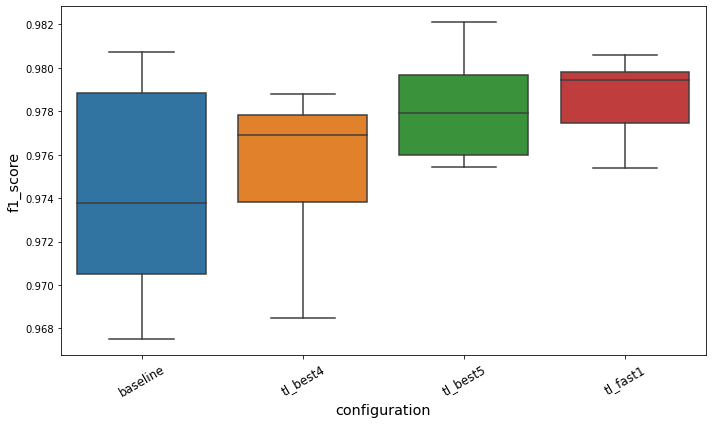

In [12]:
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()))

ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large', rotation=30)
#ax.set_xticks([])
fig.tight_layout()

# fig.savefig('../figs/glitches/14_transfer_aug_scores.png', dpi=300)